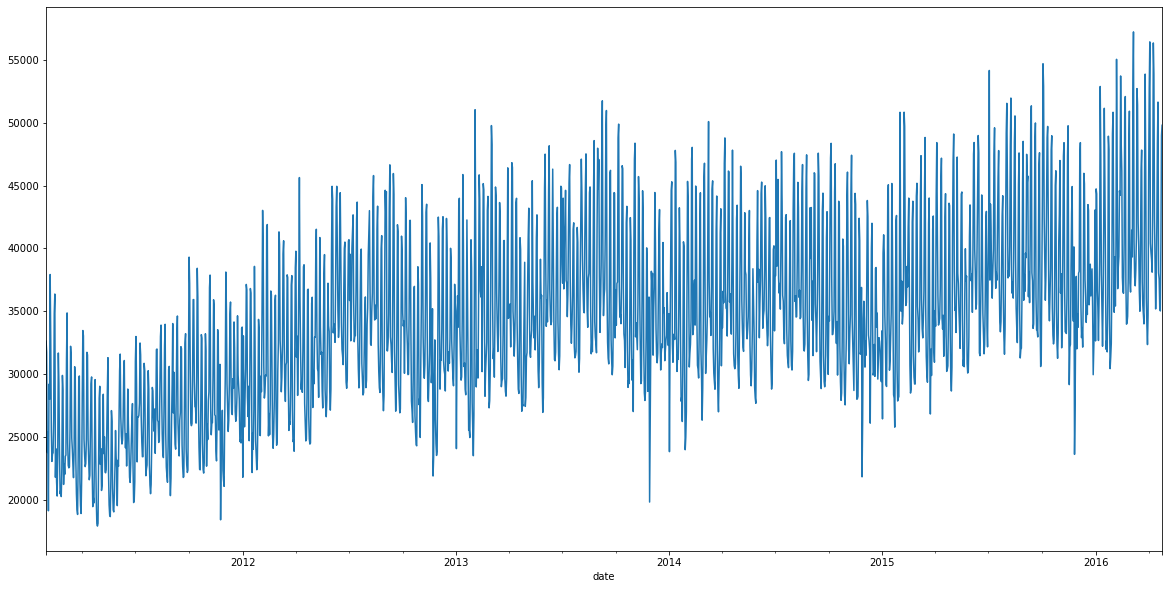

In [1]:
import pandas as pd
import numpy as np

calendar_data = pd.read_csv('../data/processed/calendar_processed-May-13-2022.csv')
calendar_data["date"] = pd.to_datetime(calendar_data["date"])
calendar_data = calendar_data.dropna(subset=['total_sales'])
calendar_data.loc[calendar_data["total_sales"] < 1000, "total_sales"] = np.NaN
calendar_data['total_sales'].interpolate(method='linear', inplace=True)
total_sales = calendar_data.set_index("date")['total_sales']
total_sales.plot(figsize=(20, 10))

In [2]:
total_sales.isnull().sum()

0

In [3]:
total_sales[total_sales.isnull()]

Series([], Name: total_sales, dtype: float64)

In [4]:
total_sales = total_sales.rolling(7).mean()
total_sales = total_sales.dropna()
total_sales.head(20)

date
2011-02-04    27134.571429
2011-02-05    27891.857143
2011-02-06    28032.857143
2011-02-07    28288.428571
2011-02-08    27954.000000
2011-02-09    28598.571429
2011-02-10    27819.285714
2011-02-11    27595.714286
2011-02-12    27153.000000
2011-02-13    27673.571429
2011-02-14    27135.285714
2011-02-15    27278.000000
2011-02-16    26961.571429
2011-02-17    26470.428571
2011-02-18    26081.285714
2011-02-19    25632.142857
2011-02-20    24618.285714
2011-02-21    24927.142857
2011-02-22    24417.285714
2011-02-23    24319.285714
Name: total_sales, dtype: float64

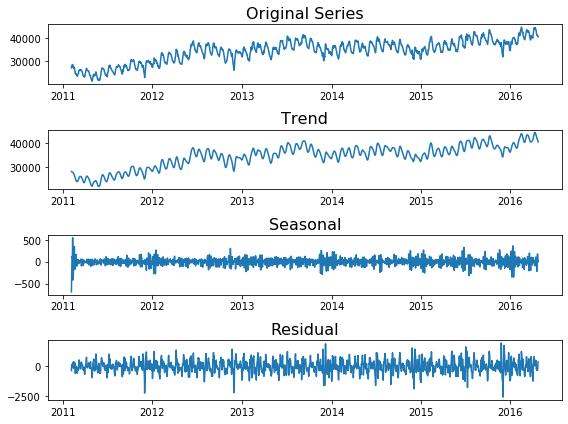

In [5]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

stl = STL(total_sales)
result = stl.fit()

seasonal, trend, resid = result.seasonal, result.trend, result.resid

plt.figure(figsize=(8,6))

plt.subplot(4,1,1)
plt.plot(total_sales)
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(resid)
plt.title('Residual', fontsize=16)

plt.tight_layout()

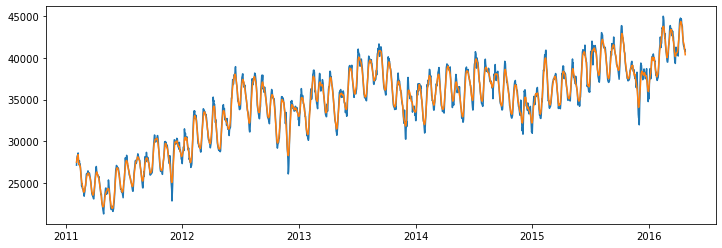

In [6]:
estimated = trend + seasonal
plt.figure(figsize=(12,4))
plt.plot(total_sales)
plt.plot(estimated)

In [7]:
resid_mu = resid.mean()
resid_dev = resid.std()

lower = resid_mu - 3*resid_dev
upper = resid_mu + 3*resid_dev

(734138.0, 736116.0)

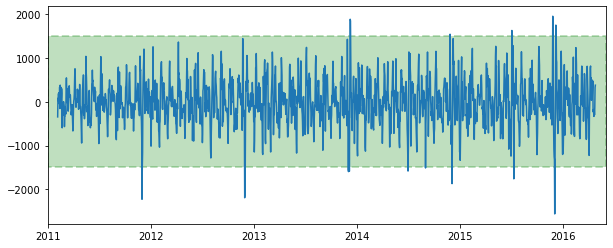

In [8]:
from datetime import datetime

plt.figure(figsize=(10,4))
plt.plot(resid)

plt.fill_between([datetime(2011,1,1), datetime(2016,6,1)], lower, upper, color='g', alpha=0.25, linestyle='--', linewidth=2)
plt.xlim(datetime(2011,1,1), datetime(2016,6,1))

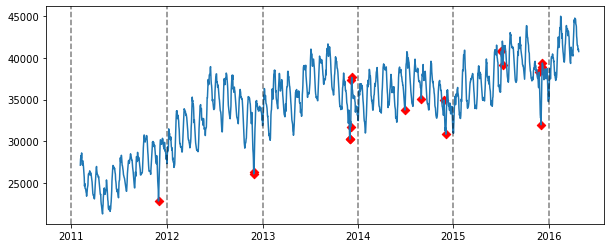

In [9]:
anomalies = total_sales[(resid < lower) | (resid > upper)]

plt.figure(figsize=(10,4))
plt.plot(total_sales)
for year in range(2011,2017):
    plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)
    
plt.scatter(anomalies.index, anomalies, color='r', marker='D')

In [10]:
anomalies

date
2011-11-30    22843.142857
2012-11-28    26084.285714
2012-11-29    26364.142857
2013-11-30    30283.000000
2013-12-01    30246.000000
2013-12-04    31753.571429
2013-12-07    37331.000000
2013-12-08    37650.571429
2014-06-30    33783.714286
2014-08-31    35098.714286
2014-11-26    34933.000000
2014-12-03    30848.285714
2015-07-03    40763.000000
2015-07-10    39152.571429
2015-11-25    38275.142857
2015-12-02    31967.428571
2015-12-06    38888.857143
2015-12-07    39373.428571
Name: total_sales, dtype: float64

/tmp/ipykernel_789651/482881813.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['store_sales'].interpolate(method='linear', inplace=True)
/tmp/ipykernel_789651/482881813.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['store_sales'].interpolate(method='linear', inplace=True)
/tmp/ipykernel_789651/482881813.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['store_sales'].interpolate(method='linear', inplace=True

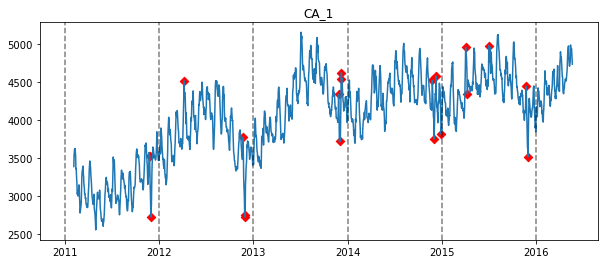

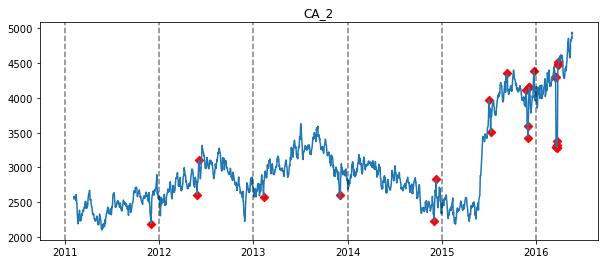

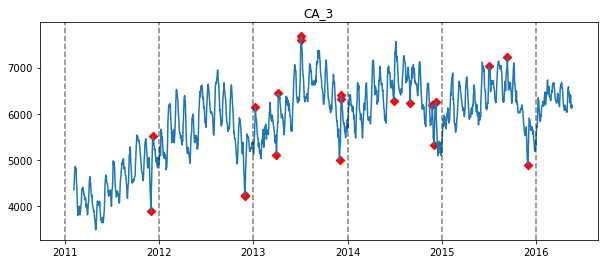

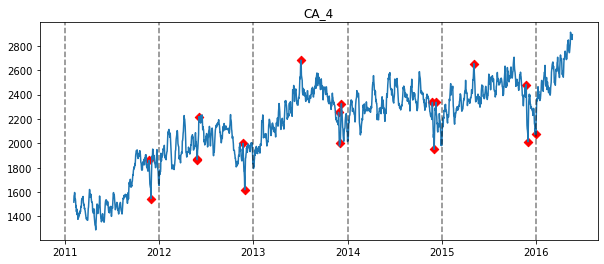

In [11]:
def anomolies(data, title):
    data = data.dropna(subset=['store_sales'])
    data.loc[data["store_sales"] < 1000, "store_sales"] = np.NaN
    data['store_sales'].interpolate(method='linear', inplace=True)
    sales = data.set_index("date")['store_sales']
    
    sales = sales.rolling(7).mean()
    sales = sales.dropna()
    
    stl = STL(sales)
    result = stl.fit()

    seasonal, trend, resid = result.seasonal, result.trend, result.resid
    estimated = trend + seasonal

    resid_mu = resid.mean()
    resid_dev = resid.std()

    lower = resid_mu - 3*resid_dev
    upper = resid_mu + 3*resid_dev

    anomalies = sales[(resid < lower) | (resid > upper)]

    plt.figure(figsize=(10,4))
    plt.title(title)
    plt.plot(sales)
    for year in range(2011,2017):
        plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)

    plt.scatter(anomalies.index, anomalies, color='r', marker='D')
    
ca1 = pd.read_csv('../data/processed/CA_1_sales_data.csv')
ca2 = pd.read_csv('../data/processed/CA_2_sales_data.csv')
ca3 = pd.read_csv('../data/processed/CA_3_sales_data.csv')
ca4 = pd.read_csv('../data/processed/CA_4_sales_data.csv')

tx1 = pd.read_csv('../data/processed/TX_1_sales_data.csv')
tx2 = pd.read_csv('../data/processed/TX_2_sales_data.csv')
tx3 = pd.read_csv('../data/processed/TX_3_sales_data.csv')

wi1 = pd.read_csv('../data/processed/WI_1_sales_data.csv')
wi2 = pd.read_csv('../data/processed/WI_2_sales_data.csv')
wi3 = pd.read_csv('../data/processed/WI_3_sales_data.csv')

ca1 = ca1.rename(columns={"Unnamed: 0": "date"})
ca1["date"] = pd.to_datetime(ca1["date"])
ca2 = ca2.rename(columns={"Unnamed: 0": "date"})
ca2["date"] = pd.to_datetime(ca2["date"])
ca3 = ca3.rename(columns={"Unnamed: 0": "date"})
ca3["date"] = pd.to_datetime(ca3["date"])
ca4 = ca4.rename(columns={"Unnamed: 0": "date"})
ca4["date"] = pd.to_datetime(ca4["date"])

anomolies(ca1, "CA_1")
anomolies(ca2, "CA_2")
anomolies(ca3, "CA_3")
anomolies(ca4, "CA_4")

/tmp/ipykernel_789651/482881813.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['store_sales'].interpolate(method='linear', inplace=True)
/tmp/ipykernel_789651/482881813.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['store_sales'].interpolate(method='linear', inplace=True)
/tmp/ipykernel_789651/482881813.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['store_sales'].interpolate(method='linear', inplace=True

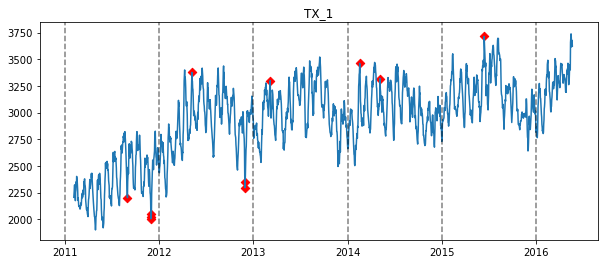

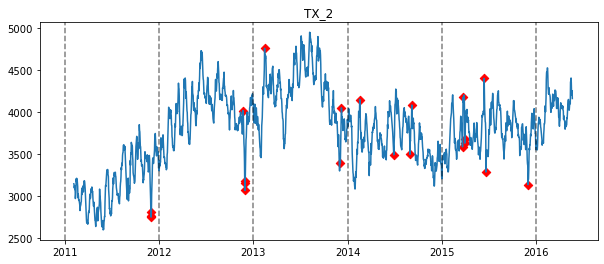

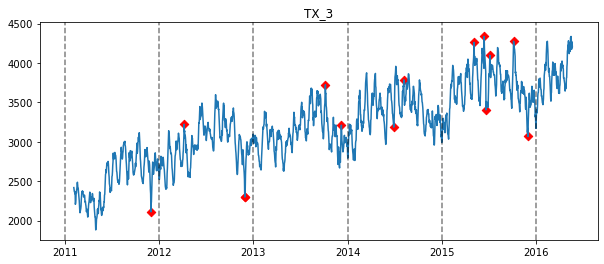

In [13]:
tx1 = tx1.rename(columns={"Unnamed: 0": "date"})
tx1["date"] = pd.to_datetime(tx1["date"])
tx2 = tx2.rename(columns={"Unnamed: 0": "date"})
tx2["date"] = pd.to_datetime(tx2["date"])
tx3 = tx3.rename(columns={"Unnamed: 0": "date"})
tx3["date"] = pd.to_datetime(tx3["date"])

anomolies(tx1, "TX_1")
anomolies(tx2, "TX_2")
anomolies(tx3, "TX_3")

/tmp/ipykernel_789651/482881813.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['store_sales'].interpolate(method='linear', inplace=True)
/tmp/ipykernel_789651/482881813.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['store_sales'].interpolate(method='linear', inplace=True)
/tmp/ipykernel_789651/482881813.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['store_sales'].interpolate(method='linear', inplace=True

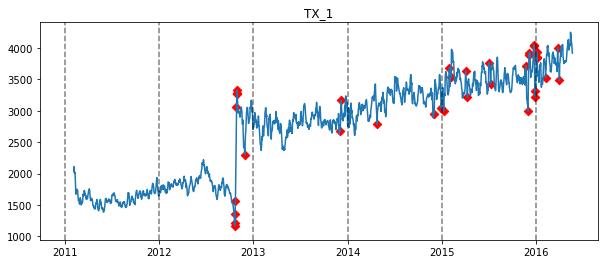

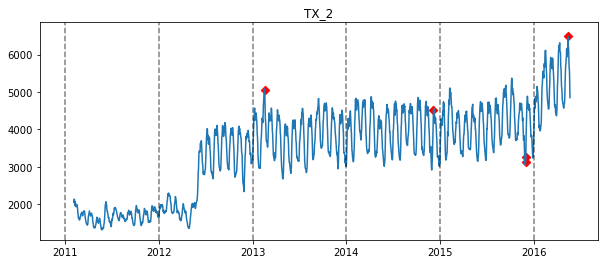

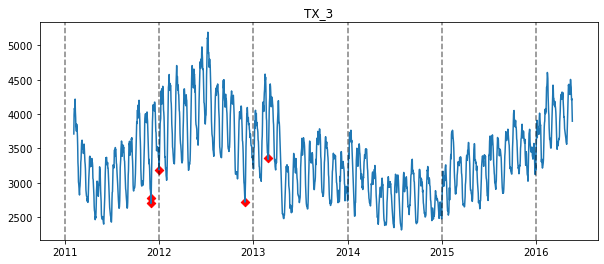

In [15]:
wi1 = wi1.rename(columns={"Unnamed: 0": "date"})
wi1["date"] = pd.to_datetime(wi1["date"])
wi2 = wi2.rename(columns={"Unnamed: 0": "date"})
wi2["date"] = pd.to_datetime(wi2["date"])
wi3 = wi3.rename(columns={"Unnamed: 0": "date"})
wi3["date"] = pd.to_datetime(wi3["date"])

anomolies(wi1, "TX_1")
anomolies(wi2, "TX_2")
anomolies(wi3, "TX_3")